In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

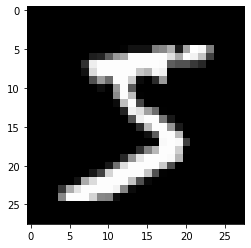

In [5]:
plt.imshow(X_train[0], 'gray')

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [7]:
X_train /= 255.0
X_test /= 255.0

In [8]:
# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

In [9]:
#Sequential model
model = Sequential()
model.add(Conv2D(64, 
                 3, activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(64, 
                 3, activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 
                 3, activation='relu',
                input_shape=(28, 28, 1)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 56s 925us/step - loss: 0.1711 - accuracy: 0.9460
Epoch 2/5
60000/60000 [==============================] - 54s 901us/step - loss: 0.0554 - accuracy: 0.9829
Epoch 3/5
60000/60000 [==============================] - 54s 898us/step - loss: 0.0413 - accuracy: 0.9875
Epoch 4/5
60000/60000 [==============================] - 53s 891us/step - loss: 0.0322 - accuracy: 0.9901
Epoch 5/5
60000/60000 [==============================] - 55s 916us/step - loss: 0.0269 - accuracy: 0.9912


In [12]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 274us/step


[0.025597269064432476, 0.9914000034332275]

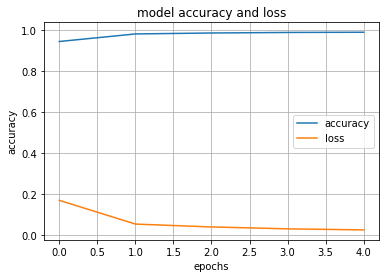

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.grid()
plt.show()

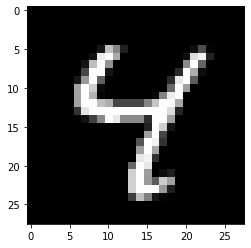

4

In [14]:
plt.imshow(X_test[6].reshape(28,28), 'gray')
plt.show()
pred = model.predict(X_test[6].reshape(1,28,28,1))
pred.argmax()